In [62]:
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
import seaborn as sns
import io

In [3]:
df_original = pd.read_csv("CSV/proyecto4.csv")


In [4]:
df_original.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country',
       'release_year', 'rating', 'duration', 'listed_in', 'plataforma'],
      dtype='object')

# CREACIÓN TABLAS DE REFERENCIA

In [5]:
# Crear tabla con los tipos 
data_tipos = [{'type_id': 1, 'type_name': 'Movie'}, {'type_id': 2, 'type_name': 'TV Show'}]

df_tipos = pd.DataFrame(data_tipos)

# Guardar la tabla como un archivo CSV
df_tipos.to_csv('tipos.csv', index=False, encoding='utf-8')

In [6]:
# Crear tabla de directores

df_directores = df_original[['show_id', 'director']].copy()


df_directores['director'] = df_directores['director'].fillna('') 

df_directores = df_directores.assign(director=df_directores['director'].str.split(', ')).explode('director')

df_directores['director'] = df_directores['director'].str.strip()

df_directores = df_directores[df_directores['director'] != '']

df_directores_final = df_directores['director'].drop_duplicates().reset_index(drop=True).to_frame()

df_directores_final = df_directores_final.reset_index()
df_directores_final = df_directores_final.rename(columns={'index': 'director_id', 'director': 'director_name'})

# Asegurar que el ID empiece en 1
df_directores_final['director_id'] = df_directores_final['director_id'] + 1

# Guardar la tabla única de directores
df_directores_final.to_csv('directores.csv', index=False, encoding='utf-8')

In [7]:
# Crear tabla de cast

df_actores = df_original[['show_id', 'cast']].copy()

df_actores['cast'] = df_actores['cast'].fillna('') 

# Se crea una fila única para cada actor, repitiendo el show_id.
df_actores = df_actores.assign(cast=df_actores['cast'].str.split(', ')).explode('cast')

df_actores['cast'] = df_actores['cast'].str.strip()

df_actores = df_actores[df_actores['cast'] != '']

df_actores_final = df_actores['cast'].drop_duplicates().reset_index(drop=True).to_frame()


df_actores_final = df_actores_final.reset_index()
df_actores_final = df_actores_final.rename(columns={'index': 'cast_id', 'cast': 'cast_name'})

# Asegurar que el ID empiece en 1 
df_actores_final['cast_id'] = df_actores_final['cast_id'] + 1

# 4. Guardar la tabla única de actores
df_actores_final.to_csv('actores.csv', index=False, encoding='utf-8')

In [8]:
# TABLA PLATAFORMA. 
plataforma = df_original['plataforma']
valores_unicos = df_original['plataforma'].unique() #Sacar los valores unicos 
plataforma_unicos = pd.DataFrame({'plataforma': valores_unicos})
plataforma_unicos['plataforma_id'] = range(1, len(plataforma_unicos) + 1)
plataforma_unicos = plataforma_unicos[['plataforma_id', 'plataforma']]

In [ ]:
# Tabla año lanzamiento
year = df_original['release_year']
valores_year = df_original['release_year'].unique()
year_tratado = pd.DataFrame({'release_year': valores_year})
year_unicos = year_tratado.sort_values(by='release_year', ascending=False)
year_unicos['release_year_id'] = range(1,len(year_unicos) + 1)
year_unicos = year_unicos[['release_year_id', 'release_year']]

In [10]:
# Tratamiento de country como columna. Lo primero que hacemos es tratar los missing values. Después, normalizamos todo para poder quedarnos con el primer value que aparece
df_original['country'] = df_original['country'].replace({'Missing values': 'Desconocido'})
df_original['country'] = df_original['country'].astype(str).apply(lambda x: x.split(',')[0].strip())
df_original['country'] = df_original['country'].apply(lambda x: x.split(',')[0].strip())

In [11]:
# TABLA COUNTRY
country = df_original['country']
valores_country = df_original['country'].unique()
country_tratado = pd.DataFrame({'country': valores_country})
country_unicos = country_tratado.sort_values(by='country', ascending=True)
country_unicos['country_id'] = range(1,len(country_unicos) + 1)
country_unicos = country_unicos[['country_id', 'country']]

In [12]:
# Tratamiento de genero como columna. Lo primero que hacemos es normalizar para poder tratar los values como valores unicos. Después, nos hemos quedado con los primeros valores 
df_original['listed_in'] = df_original['listed_in'].astype(str).apply(lambda x: x.split(',')[0].strip())
df_original['listed_in'] = df_original['listed_in'].apply(lambda x: x.split(',')[0].strip())

In [13]:
#Tabla Genero
genero = df_original['listed_in']
valores_genero = df_original['listed_in'].unique()
genero_tratado = pd.DataFrame({'listed_in': valores_genero})
genero_unicos = genero_tratado.sort_values(by='listed_in', ascending=True)
genero_unicos['listed_in_id'] = range(1,len(genero_unicos) + 1)
genero_unicos = genero_unicos[['listed_in_id', 'listed_in']]

In [14]:
# TABLA TITULOS
titulo = df_original['title']
titulo_unicos = df_original['title'].unique() #Sacar los valores unicos 
titulo_unicos = pd.DataFrame({'title': titulo_unicos})
titulo_unicos['title_id'] = range(1, len(titulo_unicos) + 1)
titulo_unicos = titulo_unicos[['title_id', 'title']]

In [ ]:
# Guardar como .csv
plataforma_unicos.to_csv('CSV/plataforma.csv', index=False, encoding='utf-8')
year_unicos.to_csv('CSV/año.csv', index=False, encoding='utf-8')
country_unicos.to_csv('CSV/pais.csv', index=False, encoding='utf-8')
genero_unicos.to_csv('CSV/genero.csv', index=False, encoding='utf-8')
titulo_unicos.to_csv('CSV/titulo.csv', index=False, encoding='utf-8')

# CREACIÓN TABLAS PUENTE

In [ ]:
# DF actores_intermedio para poder crear tabla puente de actores
df_temp = df_original[['show_id', 'cast']].copy()

df_temp['cast'] = df_temp['cast'].fillna('') 

df_actores_intermedio = df_temp.assign(
    cast_name=df_temp['cast'].str.split(', ')
).explode('cast_name')

df_actores_intermedio['cast_name'] = df_actores_intermedio['cast_name'].str.strip()

df_actores_intermedio = df_actores_intermedio[df_actores_intermedio['cast_name'] != '']

df_actores_intermedio = df_actores_intermedio[['show_id', 'cast_name']]


In [17]:
# Tabla puente show_actor

df_title_cast = pd.merge(
    df_actores_intermedio, 
    df_actores_final,       
    on='cast_name',        
    how='left'              
)

df_title_cast = df_title_cast[['show_id', 'cast_id']]

df_title_cast = df_title_cast.drop_duplicates().reset_index(drop=True)

# Guardar la tabla puente como un archivo CSV
df_title_cast.to_csv('show_actor.csv', index=False, encoding='utf-8')

In [18]:
# Tabla puente show_genre

df_temp_generos = df_original[['show_id', 'listed_in']].copy()

df_temp_generos['listed_in'] = df_temp_generos['listed_in'].fillna('') 

df_generos_intermedio = df_temp_generos.assign(
    genre_name=df_temp_generos['listed_in'].str.split(', ')
).explode('genre_name')

df_generos_intermedio['genre_name'] = df_generos_intermedio['genre_name'].str.strip()
df_generos_intermedio = df_generos_intermedio[df_generos_intermedio['genre_name'] != '']

df_generos_intermedio = df_generos_intermedio[['show_id', 'genre_name']]

df_genero_referencia = genero_unicos.rename(columns={'listed_in_id': 'genre_id', 'listed_in': 'genre_name'})

df_title_genre = pd.merge(
    df_generos_intermedio, 
    df_genero_referencia[['genre_id', 'genre_name']], 
    on='genre_name',       
    how='left'              
)

df_title_genre = df_title_genre[['show_id', 'genre_id']]

df_title_genre = df_title_genre.drop_duplicates().reset_index(drop=True)

# Guardar la tabla puente como un archivo CSV
df_title_genre.to_csv('show_genre.csv', index=False, encoding='utf-8')

In [19]:
# Tabla puente show_director

df_temp_directores = df_original[['show_id', 'director']].copy()

df_temp_directores['director'] = df_temp_directores['director'].fillna('') 

df_directores_intermedio = df_temp_directores.assign(
    director_name=df_temp_directores['director'].str.split(', ')
).explode('director_name')
 
df_directores_intermedio['director_name'] = df_directores_intermedio['director_name'].str.strip()
df_directores_intermedio = df_directores_intermedio[df_directores_intermedio['director_name'] != '']

df_directores_intermedio = df_directores_intermedio[['show_id', 'director_name']]

df_title_director = pd.merge(
    df_directores_intermedio,  
    df_directores_final[['director_id', 'director_name']], 
    on='director_name',        
    how='left'              
)

df_title_director = df_title_director[['show_id', 'director_id']]

df_title_director = df_title_director.drop_duplicates().reset_index(drop=True)

# Guardar la tabla puente como un archivo CSV
df_title_director.to_csv('show_director.csv', index=False, encoding='utf-8')

In [20]:
# Tabla puente show_country

df_temp_paises = df_original[['show_id', 'country']].copy()
df_temp_paises['country'] = df_temp_paises['country'].fillna('') 

df_paises_intermedio = df_temp_paises.assign(
    country_name=df_temp_paises['country'].str.split(', ')
).explode('country_name')

df_paises_intermedio['country_name'] = df_paises_intermedio['country_name'].str.strip()
df_paises_intermedio = df_paises_intermedio[df_paises_intermedio['country_name'] != '']

df_paises_intermedio = df_paises_intermedio[['show_id', 'country_name']]

df_referencia_paises = country_unicos.rename(columns={'country': 'country_name'})

df_title_country = pd.merge(
    df_paises_intermedio,       
    df_referencia_paises,      
    on='country_name',        
    how='left'              
)

df_title_country = df_title_country[['show_id', 'country_id']]

df_title_country = df_title_country.drop_duplicates().reset_index(drop=True)

# Guardar la tabla puente como un archivo CSV
df_title_country.to_csv('show_country.csv', index=False,encoding='utf-8')

# TABLA PRINCIPAL

In [22]:
# Tabla principal

df_titles = df_original[['show_id', 'title', 'release_year', 'rating', 'duration', 'type', 'plataforma']].copy()

df_titles = pd.merge(
    df_titles,
    year_unicos.rename(columns={'release_year_id': 'year_id'}),
    on='release_year',
    how='left'
).drop(columns=['release_year']) 

df_titles = pd.merge(
    df_titles,
    df_tipos.rename(columns={'type_name': 'type'}),
    on='type',
    how='left'
).drop(columns=['type'])

df_titles = pd.merge(
    df_titles,
    plataforma_unicos.rename(columns={'plataforma_id': 'platform_id'}),
    on='plataforma',
    how='left'
).drop(columns=['plataforma'])

df_titles_final = df_titles[[
    'show_id', 'title', 'rating', 'duration', 
    'year_id', 'type_id', 'platform_id'
]].copy()

# Guardar la tabla principal
df_titles_final.to_csv('tabla_titles.csv', index=False, encoding='utf-8')


In [ ]:
# Corrección destino de almacenamiento de tablas para correcta importación en SQL

UPLOAD_PATH = 'C:/ProgramData/MySQL/MySQL Server 8.0/Uploads/'

# ------------------------------------------------------------------
# 1. TABLAS DE REFERENCIA
# ------------------------------------------------------------------

# 1.1. ACTORES
df_actores_final.to_csv(
    UPLOAD_PATH + 'actores.csv',
    index=False, encoding='utf-8',
    quoting=csv.QUOTE_NONE, sep=',', escapechar='\\'
)

# 1.2. DIRECTORES
df_directores_final.to_csv(
    UPLOAD_PATH + 'directores.csv',
    index=False, encoding='utf-8',
    quoting=csv.QUOTE_NONE, sep=',', escapechar='\\'
)

# 1.3. GÉNEROS
genero_unicos.to_csv(
    UPLOAD_PATH + 'genero.csv',
    index=False, encoding='utf-8',
    quoting=csv.QUOTE_NONE, sep=',', escapechar='\\'
)

# 1.4. PAÍSES
country_unicos.to_csv(
    UPLOAD_PATH + 'pais.csv',
    index=False, encoding='utf-8',
    quoting=csv.QUOTE_NONE, sep=',', escapechar='\\'
)

# 1.5. TIPOS (Movie/TV Show)
df_tipos.to_csv(
    UPLOAD_PATH + 'tipos.csv',
    index=False, encoding='utf-8',
    quoting=csv.QUOTE_NONE, sep=',', escapechar='\\'
)

# ------------------------------------------------------------------
# 2. TABLA PRINCIPAL
# ------------------------------------------------------------------

df_titles_final.to_csv(
    UPLOAD_PATH + 'tabla_titles.csv',
    index=False, encoding='utf-8',
    quoting=csv.QUOTE_NONE, sep=',', escapechar='\\'
)

# ------------------------------------------------------------------
# 3. TABLAS PUENTE
# ------------------------------------------------------------------

# 3.1. TITLE_CAST
df_title_cast.to_csv(
    UPLOAD_PATH + 'show_actor.csv',
    index=False, encoding='utf-8',
    quoting=csv.QUOTE_NONE, sep=',', escapechar='\\'
)

# 3.2. TITLE_DIRECTOR
df_title_director.to_csv(
    UPLOAD_PATH + 'show_director.csv',
    index=False, encoding='utf-8',
    quoting=csv.QUOTE_NONE, sep=',', escapechar='\\'
)

# 3.3. TITLE_GENRE
df_title_genre.to_csv(
    UPLOAD_PATH + 'show_genre.csv',
    index=False, encoding='utf-8',
    quoting=csv.QUOTE_NONE, sep=',', escapechar='\\'
)

# 3.4. TITLE_COUNTRY
df_title_country.to_csv(
    UPLOAD_PATH + 'show_country.csv',
    index=False, encoding='utf-8',
    quoting=csv.QUOTE_NONE, sep=',', escapechar='\\'
)

# Importación Tablas de SQL y Realización Gráficos

In [29]:
print(pd.read_csv(r"C:\Users\delam\OneDrive\Ironhack\Proyecto-4-SQL\CSV_tablas\paises.csv"))

       country_name  total_producciones
0             nan\r               10046
1   United States\r                4624
2           India\r                1248
3  United Kingdom\r                 726
4          Canada\r                 322
5           Japan\r                 262
6          France\r                 228
7     South Korea\r                 212
8           Spain\r                 190
9          Mexico\r                 136


C:\Users\delam\AppData\Local\Temp\ipykernel_27720\2616347188.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


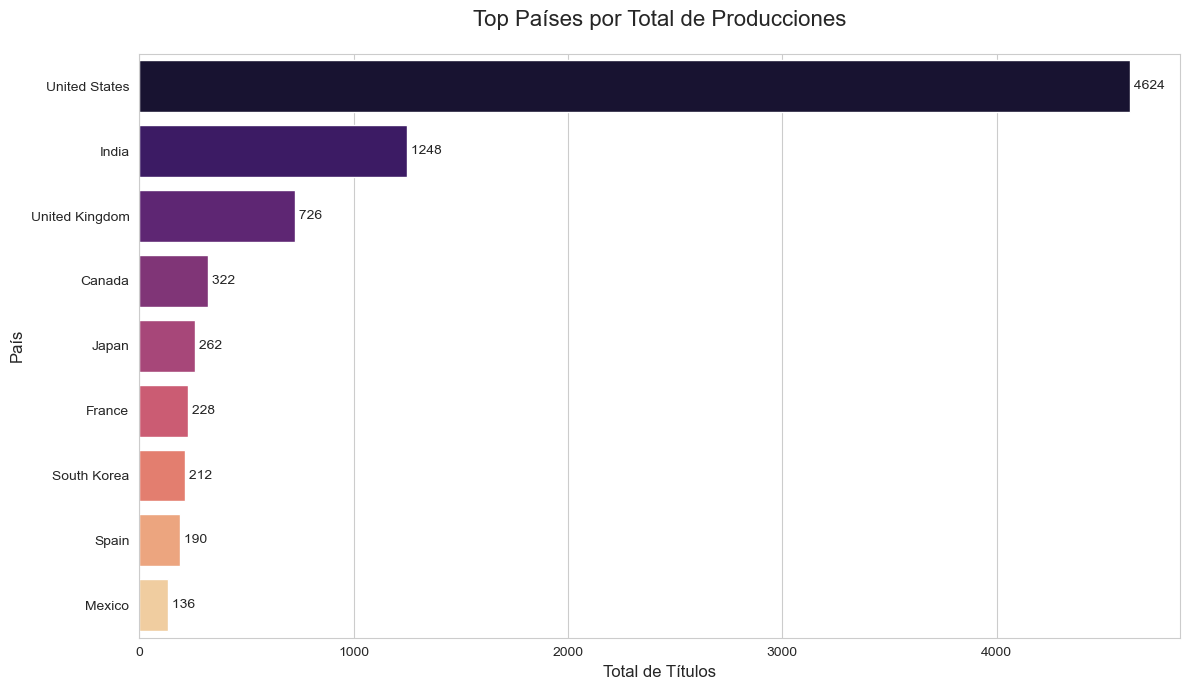

In [65]:


# 1. Definir los datos manualmente (Limpios)
# Esta es la forma más robusta de asegurar que la visualización funcione
# ignorando los caracteres '\r' y 'nan' de la entrada original.
data = {
    'País': [
        'United States',
        'India',
        'United Kingdom',
        'Canada',
        'Japan',
        'France',
        'South Korea',
        'Spain',
        'Mexico'
    ],
    'Total_Producciones': [
        4624,
        1248,
        726,
        322,
        262,
        228,
        212,
        190,
        136
    ]
}
df = pd.DataFrame(data)

# 2. Ordenar los datos (De mayor a menor)
df_sorted = df.sort_values(by='Total_Producciones', ascending=False)


# 3. Creación y Configuración del Gráfico
sns.set_style("whitegrid")
plt.figure(figsize=(12, 7))

# Crear el gráfico de barras horizontales
sns.barplot(
    x='Total_Producciones',
    y='País',
    data=df_sorted,
    palette='magma' # Nuevo esquema de color
)

# 4. Personalización y Visualización
plt.title('Top Países por Total de Producciones', fontsize=16, pad=20)
plt.xlabel('Total de Títulos', fontsize=12)
plt.ylabel('País', fontsize=12)

# Añadir etiquetas de valor
for index, value in enumerate(df_sorted['Total_Producciones']):
    plt.text(value, index, f' {value}', va='center', fontsize=10)

plt.tight_layout()
plt.show() # 👈 ¡CLAVE! Esto fuerza la visualización del gráfico

In [30]:
print(pd.read_csv(r"C:\Users\delam\OneDrive\Ironhack\Proyecto-4-SQL\CSV_tablas\producciones_por_plataforma.csv"))

  platform_name  total_producciones
0       prime\r                9668
1     netflix\r                8807
2      disney\r                1450


In [41]:
amazon = pd.read_csv(r"C:\Users\delam\OneDrive\Ironhack\Proyecto-4-SQL\CSV_tablas\producciones_amazon.csv")

In [42]:
netflix = pd.read_csv(r"C:\Users\delam\OneDrive\Ironhack\Proyecto-4-SQL\CSV_tablas\producciones_netflix.csv")

In [43]:
disney = pd.read_csv(r"C:\Users\delam\OneDrive\Ironhack\Proyecto-4-SQL\CSV_tablas\producciones_disney.csv")

In [44]:
amazon = amazon.rename(columns={'cantidad_titulos': 'prime'})
netflix = netflix.rename(columns={'cantidad_titulos': 'netflix'})
disney = disney.rename(columns={'cantidad_titulos': 'disney'})

In [52]:
plataformas = pd.merge(netflix, amazon, on='type_id', how='outer')
plataformas = pd.merge(plataformas, disney, on='type_id', how='outer')

In [58]:
plataformas['type_id'] = plataformas['type_id'].replace({1: 'peliculas', 2: 'series'})


In [59]:
plataformas

,type_id,netflix,prime,disney
0,peliculas,6131,7814,1052
1,series,2676,1854,398


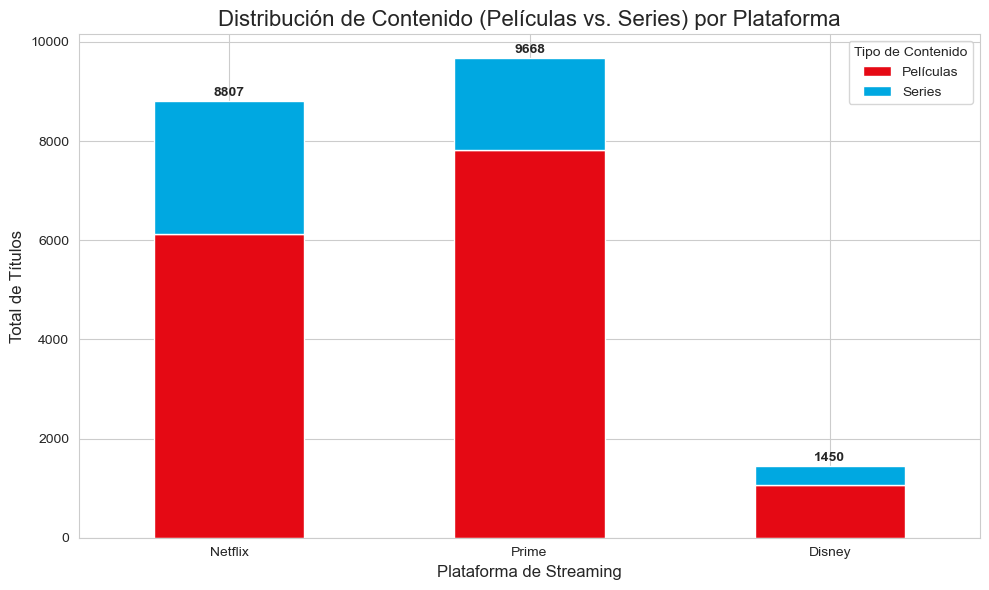

In [61]:
# 1. Crear el DataFrame a partir de la tabla proporcionada
data = {
    'Plataforma': ['Netflix', 'Prime', 'Disney'],
    'peliculas': [6131, 7814, 1052],
    'series': [2676, 1854, 398]
}
df = pd.DataFrame(data)

# Establecer la columna 'Plataforma' como índice para facilitar el ploteo
df = df.set_index('Plataforma')

# 2. Configuración del estilo de Matplotlib
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))

# 3. Crear el gráfico de barras apiladas (Stacked Bar Chart)
# Usamos el método .plot.bar() del DataFrame con stacked=True
df.plot(kind='bar', stacked=True, ax=plt.gca(), color=['#E50914', '#00A8E1'])

# 4. Personalización del gráfico
plt.title('Distribución de Contenido (Películas vs. Series) por Plataforma', fontsize=16)
plt.xlabel('Plataforma de Streaming', fontsize=12)
plt.ylabel('Total de Títulos', fontsize=12)
plt.xticks(rotation=0) # Mantiene las etiquetas de la plataforma horizontales
plt.legend(title='Tipo de Contenido', labels=['Películas', 'Series'], loc='upper right')

# Añadir los totales de cada plataforma en la parte superior (Opcional)
for i, total in enumerate(df.sum(axis=1)):
    plt.text(i, total + 100, f'{total}', ha='center', fontsize=10, fontweight='bold')

plt.tight_layout() # Ajusta el layout para que todo quepa bien
plt.show()

In [34]:
print(pd.read_csv(r"C:\Users\delam\OneDrive\Ironhack\Proyecto-4-SQL\CSV_tablas\top_10_genero.csv"))

                     Genero  total_titulos
0                   Drama\r           2243
1                  Comedy\r           1668
2                  Action\r           1657
3                  Dramas\r           1600
4                Comedies\r           1210
5             Documentary\r            978
6      Action & Adventure\r            859
7           Documentaries\r            829
8               Animation\r            818
9  International TV Shows\r            774


C:\Users\delam\AppData\Local\Temp\ipykernel_27720\2172250011.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


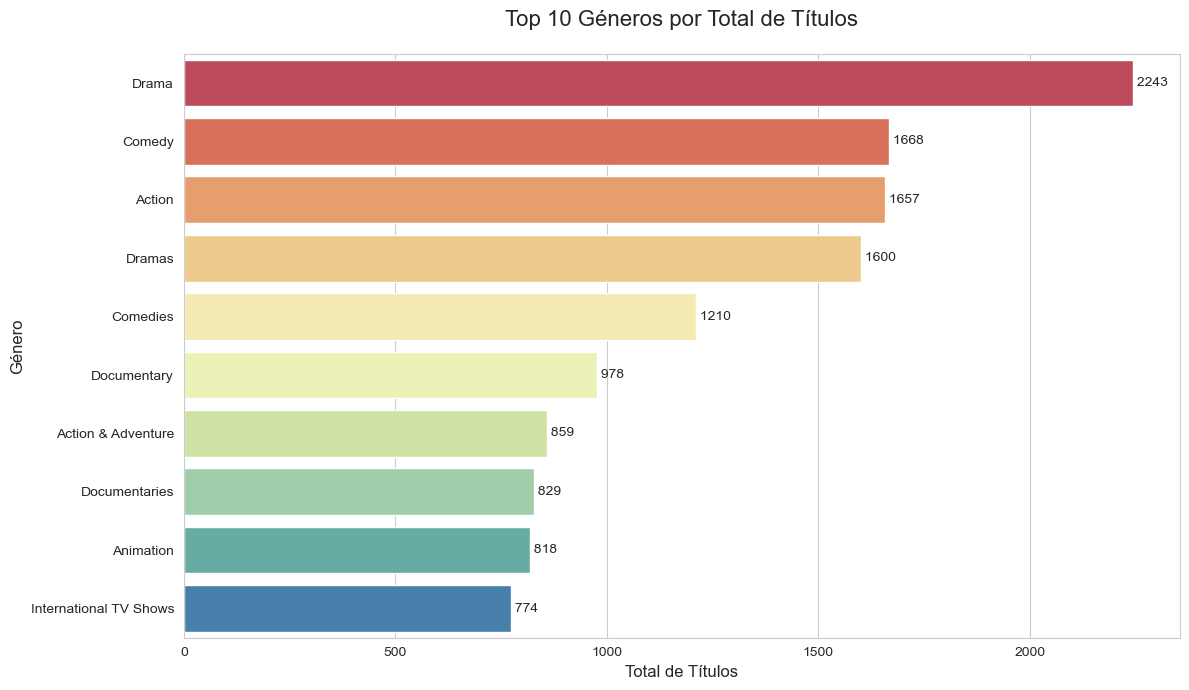

In [66]:
# 1. Definir y limpiar los datos de género proporcionados
# Los datos se pasan como una cadena de texto y se limpian para manejar el formato sucio
data = """
Genero,total_titulos
Drama,2243
Comedy,1668
Action,1657
Dramas,1600
Comedies,1210
Documentary,978
Action & Adventure,859
Documentaries,829
Animation,818
International TV Shows,774
"""

# Leemos los datos directamente usando StringIO y el separador coma
df = pd.read_csv(io.StringIO(data))

# 2. Procesamiento del DataFrame
# Eliminar espacios y caracteres de retorno de carro '\r' que pueden estar en los datos
df['Genero'] = df['Genero'].str.replace('\r', '').str.strip()

# Asegurar que 'total_titulos' es numérico
df['total_titulos'] = pd.to_numeric(df['total_titulos'], errors='coerce')

# Ordenar los datos para el gráfico
df_sorted = df.sort_values(by='total_titulos', ascending=False)

# 3. Configuración del Gráfico
sns.set_style("whitegrid")
plt.figure(figsize=(12, 7))

# Crear el gráfico de barras horizontales
sns.barplot(
    x='total_titulos',
    y='Genero',
    data=df_sorted,
    palette='Spectral' 
)

# 4. Personalización y Visualización
plt.title('Top 10 Géneros por Total de Títulos', fontsize=16, pad=20)
plt.xlabel('Total de Títulos', fontsize=12)
plt.ylabel('Género', fontsize=12)

# Añadir etiquetas de valor
for index, value in enumerate(df_sorted['total_titulos']):
    plt.text(value, index, f' {value}', va='center', fontsize=10)

plt.tight_layout()
plt.show() # Muestra el gráfico

In [35]:
print(pd.read_csv(r"C:\Users\delam\OneDrive\Ironhack\Proyecto-4-SQL\CSV_tablas\top_10_actores_usa.csv"))

                   actor  total_apariciones
0         Jim Cummings\r                 38
1      Fred Tatasciore\r                 27
2    Samuel L. Jackson\r                 24
3            Tony Hale\r                 24
4         Jeff Bennett\r                 23
5         Nicolas Cage\r                 22
6          Tara Strong\r                 21
7         Adam Sandler\r                 21
8          Walt Disney\r                 20
9  Larry the Cable Guy\r                 20


C:\Users\delam\AppData\Local\Temp\ipykernel_27720\1158433064.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


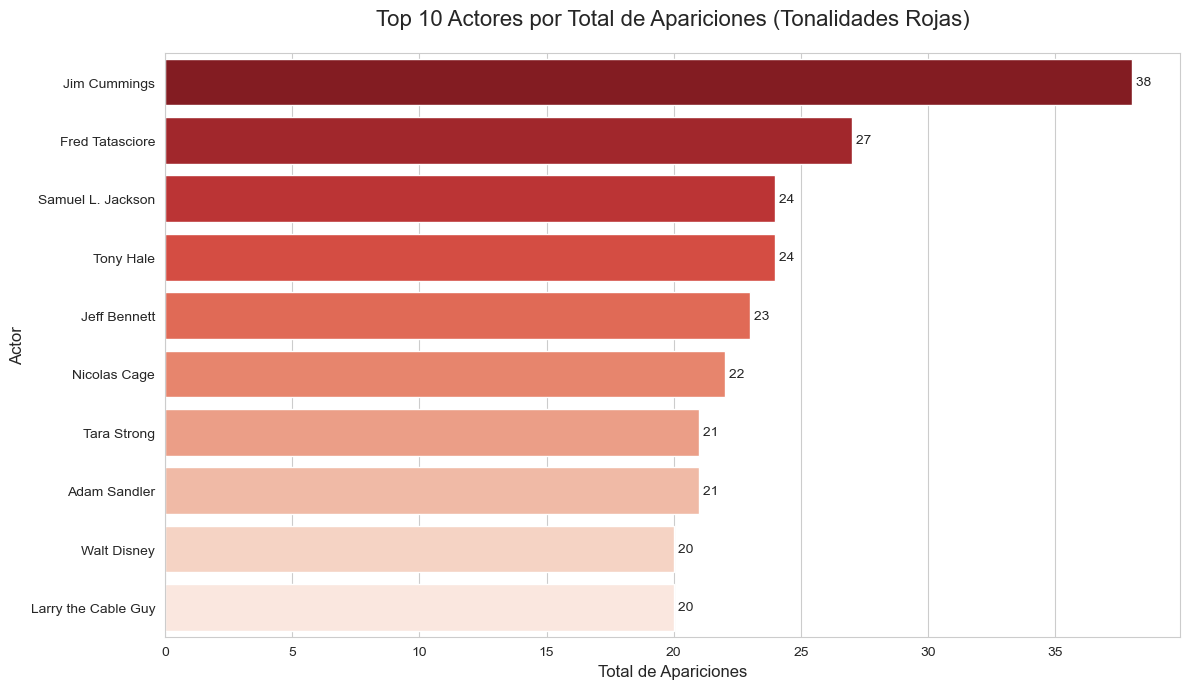

In [72]:
# 1. Datos del Top 10 de Actores (Limpios y listos para usar)
# Se limpia el carácter '\r' antes de procesar
data = """
actor,total_apariciones
Jim Cummings,38
Fred Tatasciore,27
Samuel L. Jackson,24
Tony Hale,24
Jeff Bennett,23
Nicolas Cage,22
Tara Strong,21
Adam Sandler,21
Walt Disney,20
Larry the Cable Guy,20
"""

# Leer los datos, usando ',' como separador
df = pd.read_csv(io.StringIO(data))

# 2. Data Cleaning and Preparation
df['actor'] = df['actor'].str.strip()
df['total_apariciones'] = pd.to_numeric(df['total_apariciones'], errors='coerce')

# Ordenar data (importante para que la paleta se difumine correctamente)
df_sorted = df.sort_values(by='total_apariciones', ascending=False)

# 3. Crear el Gráfico
sns.set_style("whitegrid")
plt.figure(figsize=(12, 7))

# Usamos la paleta 'Reds' para el difuminado.
sns.barplot(
    x='total_apariciones',
    y='actor',
    data=df_sorted,
    palette='Reds_r' # 'Reds_r' invierte el orden para que el más alto sea el color más oscuro/intenso.
)

# 4. Personalización y Etiquetas
plt.title('Top 10 Actores por Total de Apariciones (Tonalidades Rojas)', fontsize=16, pad=20)
plt.xlabel('Total de Apariciones', fontsize=12)
plt.ylabel('Actor', fontsize=12)

# Añadir etiquetas de valor
for index, value in enumerate(df_sorted['total_apariciones']):
    plt.text(value, index, f' {value}', va='center', fontsize=10)

plt.tight_layout()
plt.show()

In [36]:
print(pd.read_csv(r"C:\Users\delam\OneDrive\Ironhack\Proyecto-4-SQL\CSV_tablas\top_10_directores_usa.csv"))

             director  total_apariciones
0       Jack Hannah\r                 17
1   Wilfred Jackson\r                 16
2         Jay Karas\r                 16
3     John Lasseter\r                 15
4         Paul Hoen\r                 15
5      Marcus Raboy\r                 15
6  Robert Stevenson\r                 13
7    Clyde Geronimi\r                 13
8  Steven Spielberg\r                 13
9       Jay Chapman\r                 12


C:\Users\delam\AppData\Local\Temp\ipykernel_27720\2120256543.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


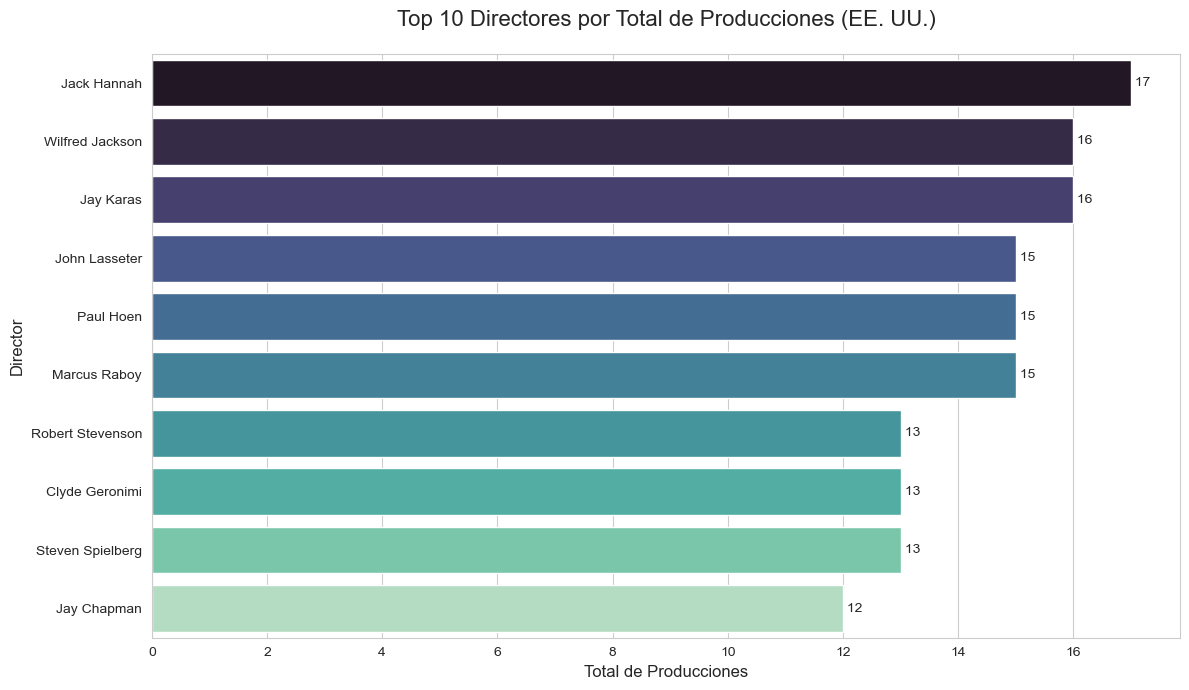

In [71]:
# 1. Datos del Top 10 de Directores (Limpios y listos para usar)
# Se asume que estos datos provienen de una consulta SQL filtrada por país.
data = {
    'director': [
        'Jack Hannah',
        'Wilfred Jackson',
        'Jay Karas',
        'John Lasseter',
        'Paul Hoen',
        'Marcus Raboy',
        'Robert Stevenson',
        'Clyde Geronimi',
        'Steven Spielberg',
        'Jay Chapman'
    ],
    'total_apariciones': [
        17,
        16,
        16,
        15,
        15,
        15,
        13,
        13,
        13,
        12
    ]
}
df = pd.DataFrame(data)

# 2. Configuración y Creación del Gráfico
sns.set_style("whitegrid")
plt.figure(figsize=(12, 7))

# Crear el gráfico de barras horizontales
sns.barplot(
    x='total_apariciones',
    y='director',
    data=df,
    palette='mako' # Esquema de color
)

# 3. Personalización y Etiquetas
plt.title('Top 10 Directores por Total de Producciones (EE. UU.)', fontsize=16, pad=20)
plt.xlabel('Total de Producciones', fontsize=12)
plt.ylabel('Director', fontsize=12)

# Añadir etiquetas de valor al final de cada barra
for index, value in enumerate(df['total_apariciones']):
    plt.text(value, index, f' {value}', va='center', fontsize=10)

plt.tight_layout()
plt.show()

In [37]:
print(pd.read_csv(r"C:\Users\delam\OneDrive\Ironhack\Proyecto-4-SQL\CSV_tablas\rating.csv"))

      rating  frecuencia
0      TV-MA        3284
1      TV-14        2447
2        13+        2117
3          R        1809
4        16+        1547
5      TV-PG        1333
6        ALL        1268
7        18+        1243
8      PG-13         949
9         PG         776
10      TV-G         619
11     TV-Y7         504
12      TV-Y         431
13         G         387
14        7+         385
15       NaN         344
16        NR         303
17     TV-NR         105
18   UNRATED          33
19  TV-Y7-FV          19
20     NC-17           6
21  AGES_18_           3
22  NOT_RATE           3
23        UR           3
24  AGES_16_           2
25        16           1
26  ALL_AGES           1
27    74 min           1
28    84 min           1
29    66 min           1


C:\Users\delam\AppData\Local\Temp\ipykernel_27720\327103994.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


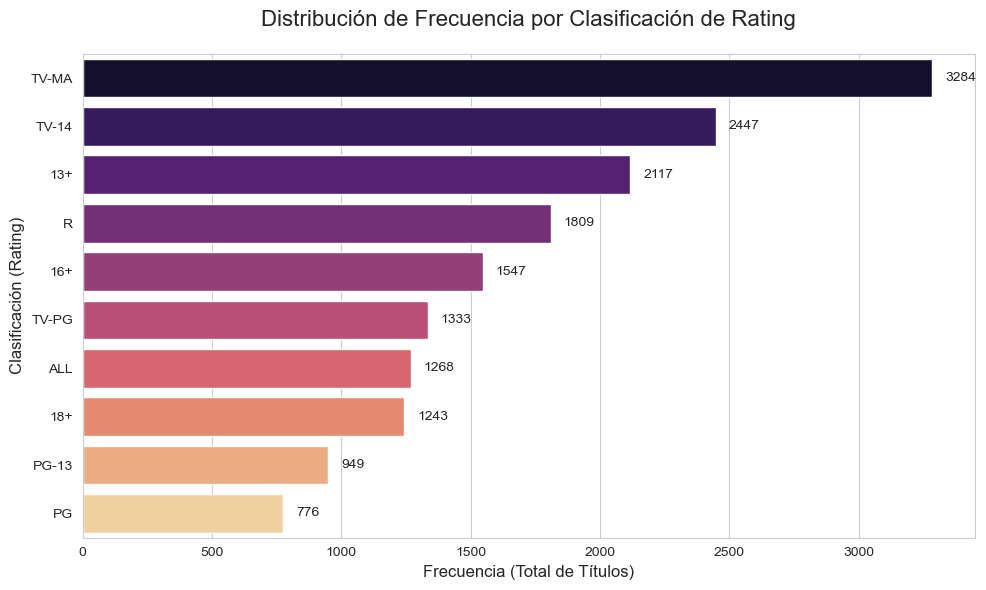

In [73]:
# 1. Datos de Frecuencia por Clasificación (Limpios y listos para usar)
data = """
rating,frecuencia
TV-MA,3284
TV-14,2447
13+,2117
R,1809
16+,1547
TV-PG,1333
ALL,1268
18+,1243
PG-13,949
PG,776
"""

# Leer los datos directamente
df = pd.read_csv(io.StringIO(data))

# 2. Data Preparation
df['frecuencia'] = pd.to_numeric(df['frecuencia'], errors='coerce')

# Ordenar data de mayor a menor frecuencia
df_sorted = df.sort_values(by='frecuencia', ascending=False)

# 3. Creación y Configuración del Gráfico
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))

# Crear el gráfico de barras horizontales con la paleta 'magma'
sns.barplot(
    x='frecuencia',
    y='rating',
    data=df_sorted,
    palette='magma' 
)

# 4. Personalización y Etiquetas
plt.title('Distribución de Frecuencia por Clasificación de Rating', fontsize=16, pad=20)
plt.xlabel('Frecuencia (Total de Títulos)', fontsize=12)
plt.ylabel('Clasificación (Rating)', fontsize=12)

# Añadir etiquetas de valor
for index, value in enumerate(df_sorted['frecuencia']):
    # Ajustamos la posición horizontal del texto
    plt.text(value + 50, index, f'{value}', va='center', fontsize=10)

plt.tight_layout()
plt.show()

In [38]:
print(pd.read_csv(r"C:\Users\delam\OneDrive\Ironhack\Proyecto-4-SQL\CSV_tablas\duracion.csv"))

    duration  tiempo
0   1 Season    3354
1  2 Seasons     736
2     90 min     402
3     91 min     386
4  3 Seasons     354
5     94 min     351
6     92 min     348
7     93 min     335
8     88 min     330
9     89 min     325


C:\Users\delam\AppData\Local\Temp\ipykernel_27720\76064204.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


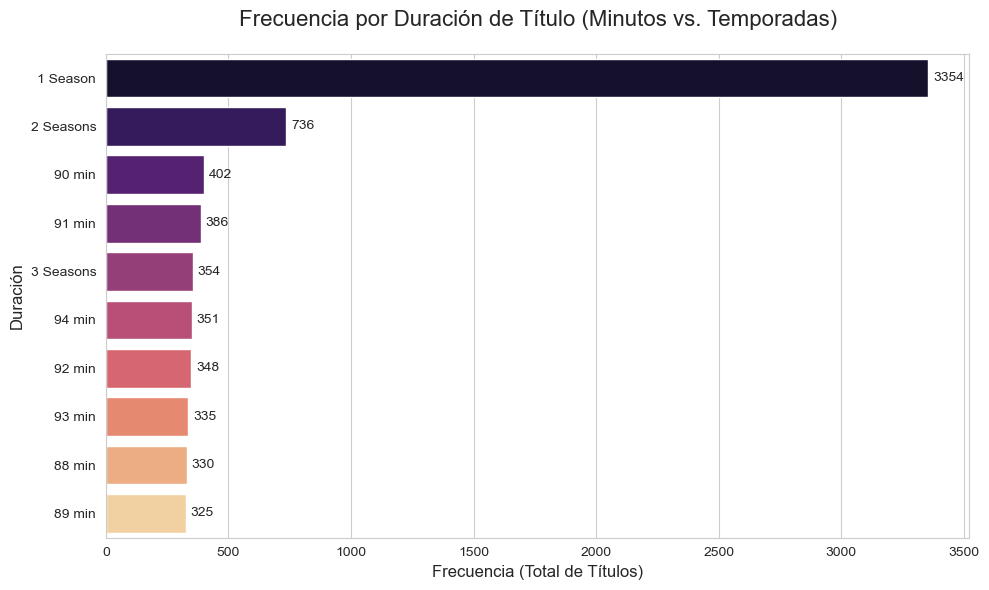

In [74]:
# 1. Datos de Frecuencia de Duración
# Los datos contienen tanto minutos (películas) como temporadas (series)
data = """
duration,tiempo
1 Season,3354
2 Seasons,736
90 min,402
91 min,386
3 Seasons,354
94 min,351
92 min,348
93 min,335
88 min,330
89 min,325
"""

# Leer los datos directamente
df = pd.read_csv(io.StringIO(data))

# 2. Data Preparation
# Renombrar columnas para claridad
df.columns = ['Duracion', 'Frecuencia']
df['Frecuencia'] = pd.to_numeric(df['Frecuencia'], errors='coerce')

# Ordenar data (aunque ya está pre-ordenada)
df_sorted = df.sort_values(by='Frecuencia', ascending=False)

# 3. Creación y Configuración del Gráfico
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))

# Crear el gráfico de barras horizontales
sns.barplot(
    x='Frecuencia',
    y='Duracion',
    data=df_sorted,
    palette='magma' # Paleta utilizada anteriormente
)

# 4. Personalización y Etiquetas
plt.title('Frecuencia por Duración de Título (Minutos vs. Temporadas)', fontsize=16, pad=20)
plt.xlabel('Frecuencia (Total de Títulos)', fontsize=12)
plt.ylabel('Duración', fontsize=12)

# Añadir etiquetas de valor
for index, value in enumerate(df_sorted['Frecuencia']):
    plt.text(value + 20, index, f'{value}', va='center', fontsize=10)

plt.tight_layout()
plt.show()